In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
import pickle
import os

In [2]:
def modelAccuracy(modelname, predictions, test_gs):
    mcounter = 0
    for i in range(len(predictions)):
        if(predictions[i]!=test_gs[i]):
            mcounter+=1
    return (1-(mcounter/len(predictions)))


In [3]:
def displayStats(predictions, truth):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    cmat = confusion_matrix(truth,predictions)
    disp = ConfusionMatrixDisplay(cmat)
    disp.plot()
    plt.show()

# Generate accuracy histograms for rev2_catboost random frame classification model

---

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import pickle
import os
from catboost import CatBoostClassifier
import pickle
from matplotlib import pyplot as plt
import numpy

def genCBMHistogram(datafile: str, numRuns: int, dumpfile: str):
    #histograms
    accuracies = []
    roc_aucs = []

    for i in range(numRuns):
        #create dataset for this run
        data = pd.read_csv(f"{datafile}",header=None)
        data = data.sample(frac=1)
        data = data.reset_index(drop=True)
        labels = data[0]
        data = data.drop(0,axis='columns')
        X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
        X_train = X_train.to_numpy()
        X_test = X_test.to_numpy()
        y_train = np.asarray(y_train.values.tolist())
        y_train = y_train.reshape(-1,1)
        y_test = np.asarray(y_test.values.tolist())
        y_test = y_test.reshape(-1,1)

        #fit classifier
        cbm = CatBoostClassifier(silent = True)
        cbm.fit(X_train,y_train)

        #predict and get values
        pred_test = cbm.predict(X_test)
        soft_preds = cbm.predict_proba(X_test)[:,1]
        # accuracy = modelAccuracy("CatBoost", pred_test, y_test)
        accuracy = accuracy_score(y_test,pred_test)
        accuracies.append(accuracy)
        # print(accuracy)
        roc_auc = roc_auc_score(y_test,soft_preds)
        roc_aucs.append(roc_aucs)

        del cbm, pred_test, soft_preds, accuracy, roc_auc
        
    with open(dumpfile+"_accuracies.pk1", "wb") as file:
        pickle.dump(accuracies,file)
    with open(dumpfile+"_rocaucs.pk1","wb") as file:
        pickle.dump(roc_aucs,file)
    
    return accuracies, roc_aucs

In [33]:
# orig_concat_accuracy, orig_concat_roc_auc = genCBMHistogram("concatVectors/original_concatVectors.csv",100)
# zayam_concat_accuracy, zayam_concat_roc_auc = genCBMHistogram("concatVectors/zayam_concatVectors.csv",100)
# combined_concat_accuracy, combined_concat_roc_auc = genCBMHistogram("concatVectors/combined_concatVectors.csv",100)

orig_nonconcat_accuracy, orig_nonconcat_roc_auc = genCBMHistogram("nonConcatVectors/set1_data_nonconcat.csv",100,"orig_nonconcat")

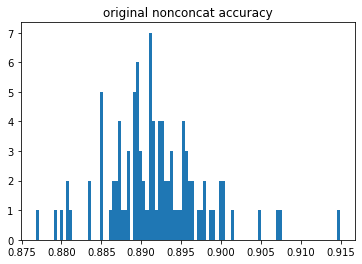

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [34]:
from matplotlib import pyplot as pyplot

plt.hist(orig_nonconcat_accuracy,bins=100)
plt.title("original nonconcat accuracy")
plt.show()
plt.figure()

In [35]:
zayam_nonconcat_accuracy, zayam_nonconcat_roc_auc = genCBMHistogram("nonConcatVectors/set2_data_nonconcat.csv",100,"zayam_nonconcat")

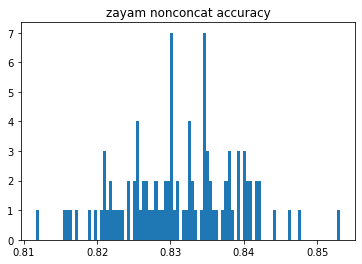

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [36]:
plt.hist(zayam_nonconcat_accuracy, bins=100)
plt.title('zayam nonconcat accuracy')
plt.show()
plt.figure()

In [44]:
combined_nonconcat_accuracy, combined_nonconcat_roc_auc = genCBMHistogram("nonConcatVectors/combined_data_nonconcat.csv",100,"combined_noncat")

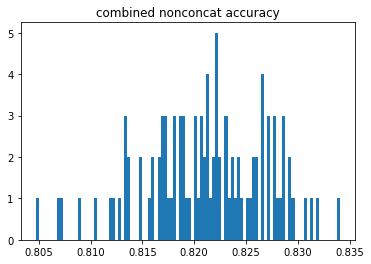

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [38]:
plt.hist(combined_nonconcat_accuracy, bins=100)
plt.title('combined nonconcat accuracy')
plt.show()
plt.figure()